In [70]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta, timezone
from dateutil import tz
import pytz


In [2]:
onebike_df = pd.read_csv('data/capital-onebike.csv')
#if you want to skip all the bullshit about converting dates,
#you can do ('data', parse_dates = ['Start date', 'End date'])

In [3]:
onebike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Start date            290 non-null    object
 1   End date              290 non-null    object
 2   Start station number  290 non-null    int64 
 3   Start station         290 non-null    object
 4   End station number    290 non-null    int64 
 5   End station           290 non-null    object
 6   Bike number           290 non-null    object
 7   Member type           290 non-null    object
dtypes: int64(2), object(6)
memory usage: 18.2+ KB


In [21]:
onebike_df.head()

,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,2017-10-01 15:23:25,2017-10-01 15:26:26,31038,Glebe Rd & 11th St N,31036,George Mason Dr & Wilson Blvd,W20529,Member
1,2017-10-01 15:42:57,2017-10-01 17:49:59,31036,George Mason Dr & Wilson Blvd,31036,George Mason Dr & Wilson Blvd,W20529,Casual
2,2017-10-02 06:37:10,2017-10-02 06:42:53,31036,George Mason Dr & Wilson Blvd,31037,Ballston Metro / N Stuart & 9th St N,W20529,Member
3,2017-10-02 08:56:45,2017-10-02 09:18:03,31037,Ballston Metro / N Stuart & 9th St N,31295,Potomac & M St NW,W20529,Member
4,2017-10-02 18:23:48,2017-10-02 18:45:05,31295,Potomac & M St NW,31230,Metro Center / 12th & G St NW,W20529,Member


In [23]:
onebike_df['Start date'] = pd.to_datetime(onebike_df['Start date'])
onebike_df['End date'] = pd.to_datetime(onebike_df['End date'])

In [27]:
time_diff = onebike_df['End date'] - onebike_df['Start date']

In [28]:
onebike_df['Trip duration'] = time_diff

In [31]:
cols = onebike_df.columns.to_list()
cols

['Start date',
 'End date',
 'Start station number',
 'Start station',
 'End station number',
 'End station',
 'Bike number',
 'Member type',
 'Trip duration']

In [34]:
cols_updated = ['Bike number',
'Start date',
 'End date',
'Trip duration',
 'Start station number',
 'Start station',
 'End station number',
 'End station',
 'Member type',]

In [36]:
onebike_df= onebike_df[cols_updated]

In [40]:
onebike_df.sort_values('Trip duration', ascending=False)[:10]

,Bike number,Start date,End date,Trip duration,Start station number,Start station,End station number,End station,Member type
86,W20529,2017-10-21 13:47:43,2017-10-22 11:09:36,0 days 21:21:53,31616,3rd & H St NE,31607,14th & D St SE,Member
96,W20529,2017-10-23 11:29:36,2017-10-23 14:38:34,0 days 03:08:58,31258,Lincoln Memorial,31289,Henry Bacon Dr & Lincoln Memorial Circle NW,Casual
172,W20529,2017-11-17 13:45:54,2017-11-17 16:36:56,0 days 02:51:02,31112,Harvard St & Adams Mill Rd NW,31296,Columbia & Ontario Rd NW,Casual
99,W20529,2017-10-23 17:13:16,2017-10-23 19:31:26,0 days 02:18:10,31258,Lincoln Memorial,31258,Lincoln Memorial,Casual
1,W20529,2017-10-01 15:42:57,2017-10-01 17:49:59,0 days 02:07:02,31036,George Mason Dr & Wilson Blvd,31036,George Mason Dr & Wilson Blvd,Casual
98,W20529,2017-10-23 15:33:48,2017-10-23 17:06:47,0 days 01:32:59,31240,Ohio Dr & West Basin Dr SW / MLK & FDR Memorials,31258,Lincoln Memorial,Casual
43,W20529,2017-10-08 14:16:40,2017-10-08 15:07:19,0 days 00:50:39,31258,Lincoln Memorial,31277,17th & G St NW,Member
128,W20529,2017-11-04 18:10:34,2017-11-04 18:58:44,0 days 00:48:10,31225,C & O Canal & Wisconsin Ave NW,31615,6th & H St NE,Member
17,W20529,2017-10-04 15:46:41,2017-10-04 16:32:33,0 days 00:45:52,31240,Ohio Dr & West Basin Dr SW / MLK & FDR Memorials,31277,17th & G St NW,Casual
218,W20529,2017-12-03 17:20:17,2017-12-03 18:04:33,0 days 00:44:16,31265,5th St & Massachusetts Ave NW,31265,5th St & Massachusetts Ave NW,Casual


In [61]:
est = tz.gettz('America/New_York')

In [62]:
print(est)

tzfile('US/Eastern')


In [63]:
tz # Prints module onject

<module 'dateutil.tz' from 'c:\\Users\\alexe\\anaconda3\\lib\\site-packages\\dateutil\\tz\\__init__.py'>

In [74]:
# Convert Trip duration into total_seconds
onebike_df['Trip duration'] = \
    onebike_df['Trip duration'].dt.total_seconds() # Must use .dt

AttributeError: Can only use .dt accessor with datetimelike values

In [75]:
onebike_df['Trip duration']

0       181.0
1      7622.0
2       343.0
3      1278.0
4      1277.0
        ...  
285     651.0
286     625.0
287     279.0
288     210.0
289     610.0
Name: Trip duration, Length: 290, dtype: float64

In [77]:
#Average trip duration by month of start date using .resample()
rides = onebike_df
rides.resample('M', on = 'Start date')[
    'Trip duration'].mean()

Start date
2017-10-31    1886.453704
2017-11-30     854.174757
2017-12-31     635.101266
Freq: M, Name: Trip duration, dtype: float64

In [80]:
#Average trip duration in seconds by start date
rides.groupby('Start date')['Trip duration'].mean()

Start date
2017-10-01 15:23:25     181.0
2017-10-01 15:42:57    7622.0
2017-10-02 06:37:10     343.0
2017-10-02 08:56:45    1278.0
2017-10-02 18:23:48    1277.0
                        ...  
2017-12-29 14:32:55     651.0
2017-12-29 15:08:26     625.0
2017-12-29 20:33:34     279.0
2017-12-30 13:51:03     210.0
2017-12-30 15:09:03     610.0
Name: Trip duration, Length: 290, dtype: float64

In [83]:
# Group by must have aggregate function
rides.groupby('Member type').size()

Member type
Casual     54
Member    236
dtype: int64

Start date
2017-10-01    AxesSubplot(0.125,0.11;0.775x0.77)
2017-10-02    AxesSubplot(0.125,0.11;0.775x0.77)
2017-10-03    AxesSubplot(0.125,0.11;0.775x0.77)
2017-10-04    AxesSubplot(0.125,0.11;0.775x0.77)
2017-10-05    AxesSubplot(0.125,0.11;0.775x0.77)
                             ...                
2017-12-26    AxesSubplot(0.125,0.11;0.775x0.77)
2017-12-27    AxesSubplot(0.125,0.11;0.775x0.77)
2017-12-28    AxesSubplot(0.125,0.11;0.775x0.77)
2017-12-29    AxesSubplot(0.125,0.11;0.775x0.77)
2017-12-30    AxesSubplot(0.125,0.11;0.775x0.77)
Freq: D, Name: Trip duration, Length: 91, dtype: object

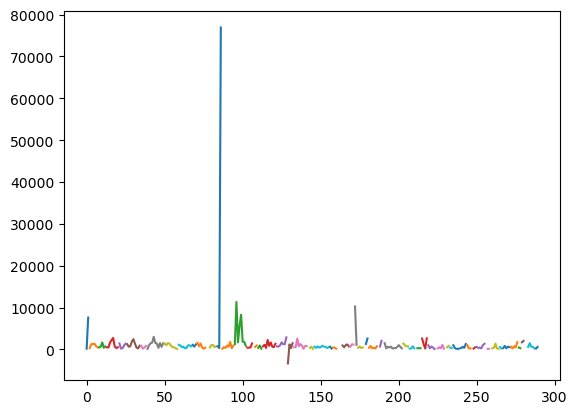

In [85]:
#Plot rides by day
rides_by_day_duration = rides.resample('D', on='Start date')\
    ['Trip duration']
  
# Plotting the above (can also just chain to the end)  
rides_by_day_duration.plot()

You can see two crazy outliers in this data - one trip that's really long, then one trip that is somehow under 0 seconds.

<AxesSubplot:xlabel='Start date'>

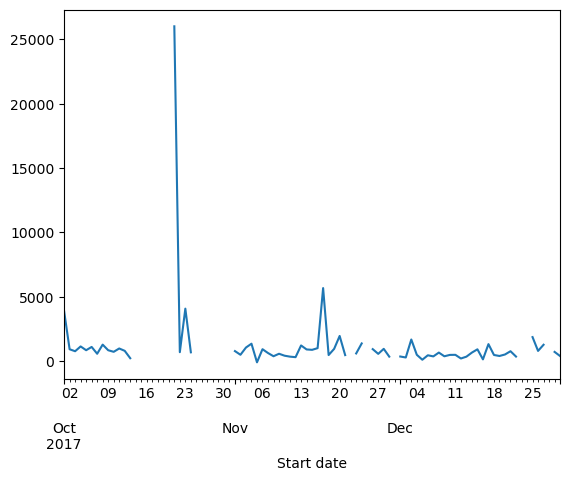

In [86]:
# Same graph as above, but by mean
rides_by_day_duration\
    .mean()\
        .plot()

You can see that this looks like a repair judging by how there were means of 0 time for the days beforehand. Makes sense that the bike was "checked out" for 7 hours for a repair.